In [1]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
from io import StringIO 
from sklearn import preprocessing
%load_ext autoreload
%autoreload 2

In [2]:
#3.3.2
def f_objective(theta, X, y, l2_param=1):
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        l2_param: regularization parameter

    Returns:
        objective: scalar value of objective function
    '''
    n = X.shape[0]
    #x_max = np.max(np.dot(-y, np.dot(X, theta)))
    summ = 0
    for i in range(n):
        summ+= np.logaddexp(0,-y[i]*np.dot(theta, X[i]))
    return summ/n + l2_param*np.sum(theta**2)

In [3]:
#3.3.3
def fit_logistic_reg(X, y, objective_function, l2_param=1):
    '''
    Args:
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        objective_function: function returning the value of the objective
        l2_param: regularization parameter
        
    Returns:
        optimal_theta: 1D numpy array of size num_features
    '''
    theta = np.zeros(X.shape[1])
    optimal_theta = minimize(objective_function, theta, args=(X,y,l2_param)).x
    return optimal_theta

In [4]:
def load_file(file_name): 
    f_myfile = open(file_name, 'r')
    d = StringIO(f_myfile.read())
    data = np.loadtxt(d,delimiter=",")
    f_myfile.close()
    return data

In [5]:
X_train = load_file("/Users/cyian/Desktop/NYU/SPRING2018/DS-GA1003/hw5-probabilistic/logistic-code/X_train.txt")
X_val = load_file("/Users/cyian/Desktop/NYU/SPRING2018/DS-GA1003/hw5-probabilistic/logistic-code/X_val.txt")
y_train = load_file("/Users/cyian/Desktop/NYU/SPRING2018/DS-GA1003/hw5-probabilistic/logistic-code/y_train.txt")
y_val = load_file("/Users/cyian/Desktop/NYU/SPRING2018/DS-GA1003/hw5-probabilistic/logistic-code/y_val.txt")
train_bias = np.ones((X_train.shape[0],1))
val_bias = np.ones((X_val.shape[0],1))
X_train_bias = np.hstack((X_train, train_bias))
X_val_bias = np.hstack((X_val, val_bias))
X_train_bias_std = preprocessing.scale(X_train_bias)
X_val_bias_std = preprocessing.scale(X_val_bias)

In [6]:
y_train_j = np.where(y_train>0.5, 1, -1)
y_val_j = np.where(y_val>0.5, 1, -1)

In [286]:
w_1 = fit_logistic_reg(X_train_bias_std, y_train_j, f_objective)

In [176]:
w_1

array([  9.55682759e-04,  -2.98411854e-04,   3.02812767e-03,
         1.05326700e-01,  -3.58837262e-03,  -1.35879681e-03,
        -3.85259502e-03,  -7.90123362e-04,  -1.14392118e-03,
        -7.17819733e-02,   6.54800235e-03,  -4.51121904e-03,
         1.12491086e-02,  -3.86491439e-03,  -2.71224635e-03,
         1.50343327e-03,  -2.78428667e-03,  -9.19058606e-03,
        -6.82319847e-03,  -1.02758826e-02,  -1.32052354e-08])

In [197]:
#3.3.4
def get_loglikelihood(X, y, w, l2_param):
    n = X.shape[0]
    obj_val = f_objective(w,X,y, l2_param)
    return -n*(obj_val-l2_param*np.sum(w**2))
l2_val = np.arange(-3, 5, 0.5, dtype=float)
loglike = []
for i in l2_val:
    w = fit_logistic_reg(X_train_bias_std, y_train_j, f_objective, 10**i)
    loglike.append(get_loglikelihood(X_val_bias_std, y_val_j, w, 10**i))

In [198]:
loglike

[-234.30453496703413,
 -233.93937642429225,
 -233.2450685837853,
 -233.33009336599005,
 -238.31093795670054,
 -250.66153831601724,
 -264.09855408108916,
 -272.17858365174169,
 -275.53065064797767,
 -276.69894293170302,
 -277.08041928533697,
 -277.20229924530776,
 -277.24096828728824,
 -277.25320938020866,
 -277.25708162908035,
 -277.25830626936636]

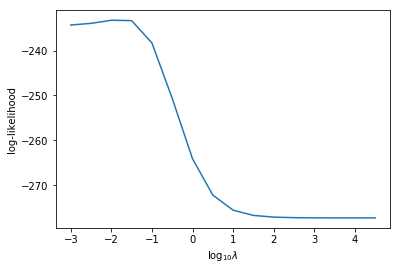

In [199]:
import matplotlib.pyplot as plt
plt.plot(l2_val,loglike)
plt.xlabel('$\log_{10}\lambda$')
plt.ylabel("log-likelihood")
plt.show()

In [201]:
from operator import itemgetter
zipped = zip(l2_val, loglike)
max(zipped, key = itemgetter(1))[0]

-2.0

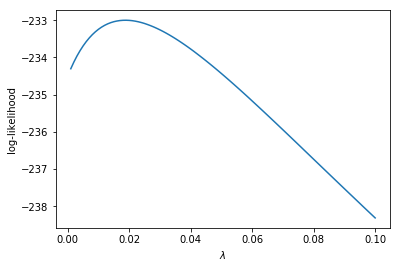

In [208]:
l2_val2 = np.linspace(0.001, 0.1, 100)
loglike2 = []
for i in l2_val2:
    w = fit_logistic_reg(X_train_bias_std, y_train_j, f_objective, i)
    loglike2.append(get_loglikelihood(X_val_bias_std, y_val_j, w, i))
plt.plot(l2_val2,loglike2)
plt.xlabel('$\lambda$')
plt.ylabel("log-likelihood")
plt.show()

In [210]:
from operator import itemgetter
zipped = zip(l2_val2, loglike2)
best_lambda = max(zipped, key = itemgetter(1))[0]
best_lambda

0.019000000000000003

In [33]:
best_lambda = 0.019

In [34]:
#3.3.5
def predicted_probability(w, x):
    return 1/(1+np.exp(-np.dot(w, x)))

In [35]:
w_2 = fit_logistic_reg(X_train_bias_std, y_train_j, f_objective, best_lambda)
n_x_val = X_val_bias_std.shape[0]
predicted_x = []
for i in range(n_x_val):
    predicted_x.append(predicted_probability(w_2, X_val_bias_std[i]))
predicted_x

[0.33869637584968437,
 0.68344394395296137,
 0.24478462934103798,
 0.15055571927054068,
 0.72863811264042067,
 0.28486795471048432,
 0.65008847834377381,
 0.53589062391227915,
 0.086363101135035605,
 0.26689864152713583,
 0.89355026073291455,
 0.43364323288327244,
 0.52360470466779019,
 0.33255410167135135,
 0.34722236564718501,
 0.22624068984891207,
 0.35722089829508985,
 0.24907149190277858,
 0.54117219097603231,
 0.55957234316937943,
 0.30943358126965076,
 0.21730091285275971,
 0.33994248958098411,
 0.69369446082788966,
 0.411835295304191,
 0.64435421316905817,
 0.2198581014031229,
 0.36470955095276064,
 0.65281008484027137,
 0.82518932867970618,
 0.30282016231924203,
 0.90735495335942662,
 0.21278836598733908,
 0.87736929397480756,
 0.31657882148261879,
 0.59487746922575802,
 0.44814492301574271,
 0.5236822179823255,
 0.48124093891261627,
 0.35214403221864954,
 0.31413681655102105,
 0.78662313385724314,
 0.23258257644513952,
 0.22367038950315121,
 0.28292892328646196,
 0.4241188264

In [36]:
zipped_pred = zip(y_val, predicted_x)
lst = list(zipped_pred)

In [37]:
sorted(lst, key=lambda tup: tup[1])

[(0.0, 0.052666478214826805),
 (0.0, 0.07168709817243564),
 (0.0, 0.083173376404455629),
 (1.0, 0.086363101135035605),
 (0.0, 0.11613079089968363),
 (0.0, 0.1295889483911622),
 (1.0, 0.13620773595664087),
 (1.0, 0.14609300244825901),
 (0.0, 0.14699471111676302),
 (1.0, 0.15055571927054068),
 (0.0, 0.15220402482948495),
 (0.0, 0.15378991960524382),
 (1.0, 0.16840299533852091),
 (0.0, 0.17017579850758879),
 (0.0, 0.17456345974679588),
 (1.0, 0.1787178102613306),
 (0.0, 0.1831977103519335),
 (0.0, 0.18511690796187738),
 (0.0, 0.18640404926437931),
 (0.0, 0.19097079274331571),
 (1.0, 0.19259850064788761),
 (0.0, 0.19541039456860804),
 (0.0, 0.19619834426000285),
 (0.0, 0.19831882161845579),
 (0.0, 0.19997661418130616),
 (0.0, 0.20133041812941074),
 (0.0, 0.2033282438866206),
 (0.0, 0.21060564953518962),
 (1.0, 0.21278836598733908),
 (0.0, 0.21522454719403911),
 (0.0, 0.21730091285275971),
 (0.0, 0.2198581014031229),
 (0.0, 0.2222563908750933),
 (0.0, 0.22367038950315121),
 (1.0, 0.22624068

In [38]:
def slice_tuple(min_val, max_val, lst):
    pos = []
    for i in lst:
        if i[1] >min_val and i[1]<=max_val:
            pos.append(i)
    return pos

In [41]:
pos1 = slice_tuple(0,0.1,lst)
pos2 = slice_tuple(0.1,0.2,lst)
pos3 = slice_tuple(0.2,0.3,lst)
pos4 = slice_tuple(0.3,0.4,lst)
pos5 = slice_tuple(0.4,0.5,lst)
pos6 = slice_tuple(0.5,0.6,lst)
pos7 = slice_tuple(0.6,0.7,lst)
pos8 = slice_tuple(0.7,0.8,lst)
pos9 = slice_tuple(0.8,0.9,lst)
pos10 = slice_tuple(0.9,1,lst)

In [42]:
def percent_tuple(lst):
    n = len(lst)
    count = 0
    for i in lst:
        if i[0] == 1:
            count +=1
    return count/n

In [43]:
per1 = percent_tuple(pos1)
per2 = percent_tuple(pos2)
per3 = percent_tuple(pos3)
per4 = percent_tuple(pos4)
per5 = percent_tuple(pos5)
per6 = percent_tuple(pos6)
per7 = percent_tuple(pos7)
per8 = percent_tuple(pos8)
per9 = percent_tuple(pos9)
per10 = percent_tuple(pos10)

In [44]:
percent = [per1, per2, per3, per4, per5, per6, per7, per8, per9, per10]
percent

[0.25,
 0.2857142857142857,
 0.25396825396825395,
 0.23809523809523808,
 0.4426229508196721,
 0.631578947368421,
 0.85,
 0.8461538461538461,
 0.7741935483870968,
 0.8421052631578947]

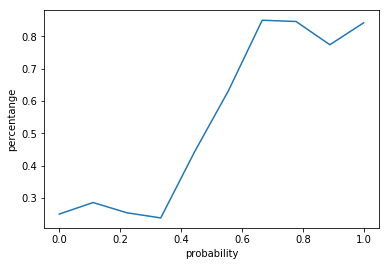

In [45]:
plt.plot(np.linspace(0,1,10), percent)
plt.xlabel("probability")
plt.ylabel("percentange")
plt.show()

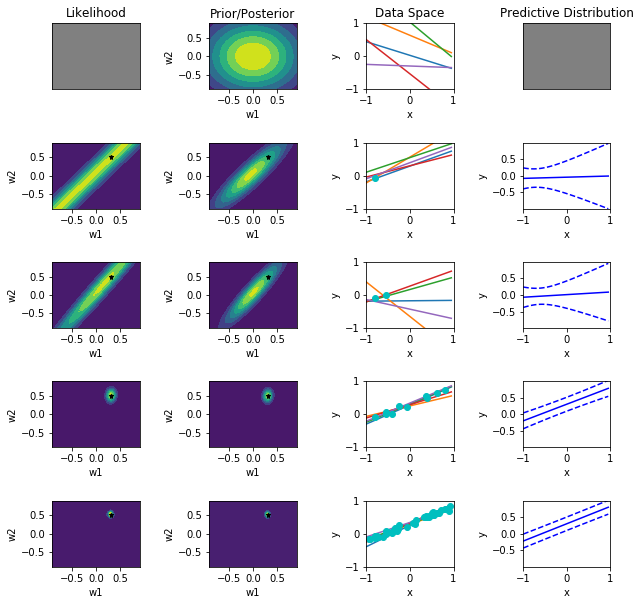

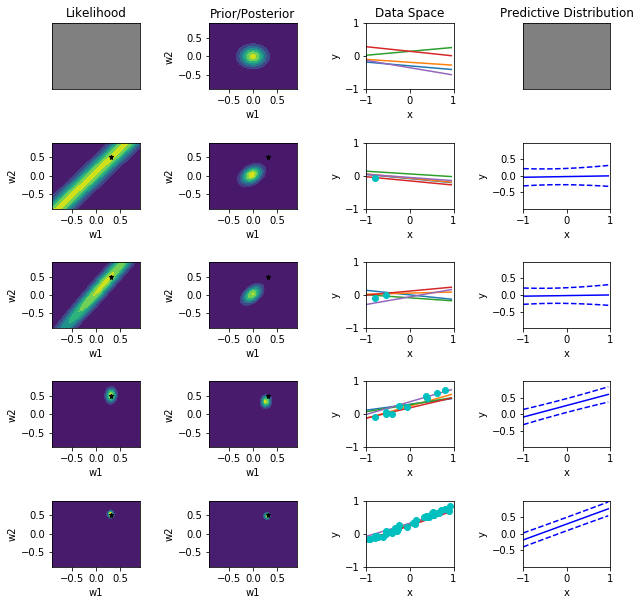

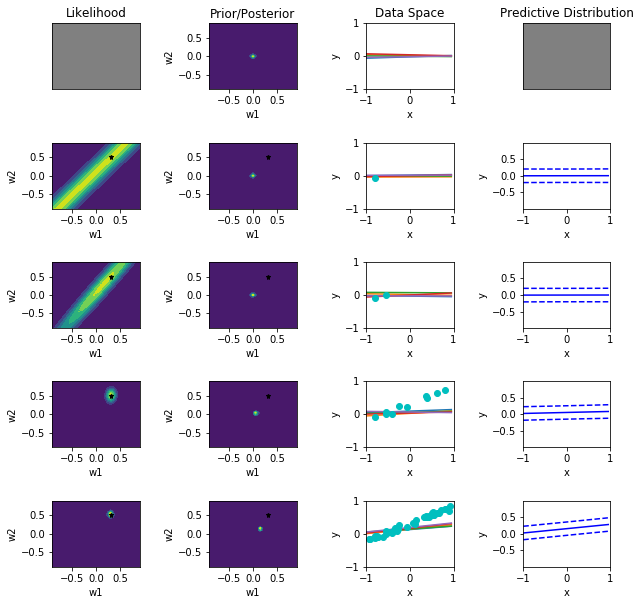

In [7]:
# %load problem.py
from __future__ import division

import matplotlib.pyplot as plt
import numpy.matlib as matlib
from scipy.stats import multivariate_normal
import numpy as np
import support_code
import math

def likelihood_func(w, X, y_train, likelihood_var):
    '''
    Implement likelihood_func. This function returns the data likelihood
    given f(y_train | X; w) ~ Normal(Xw, likelihood_var).

    Args:
        w: Weights
        X: Training design matrix with first col all ones (np.matrix)
        y_train: Training response vector (np.matrix)
        likelihood_var: likelihood variance

    Returns:
        likelihood: Data likelihood (float)
    '''

    #TO DO
    likelihood = 1
    k = X.shape[0]
    for i in range(k):
        likelihood *= (2*math.pi*likelihood_var)**0.5*np.exp(-0.5*(y_train[i]-np.dot(X[i], w))**2/likelihood_var)

    return likelihood

def get_posterior_params(X, y_train, prior, likelihood_var = 0.2**2):
    '''
    Implement get_posterior_params. This function returns the posterior
    mean vector \mu_p and posterior covariance matrix \Sigma_p for
    Bayesian regression (normal likelihood and prior).

    Note support_code.make_plots takes this completed function as an argument.

    Args:
        X: Training design matrix with first col all ones (np.matrix)
        y_train: Training response vector (np.matrix)
        prior: Prior parameters; dict with 'mean' (prior mean np.matrix)
               and 'var' (prior covariance np.matrix)
        likelihood_var: likelihood variance- default (0.2**2) per the lecture slides

    Returns:
        post_mean: Posterior mean (np.matrix)
        post_var: Posterior mean (np.matrix)
    '''

    # TO DO
    prior_var = prior['var']
    post_mean = np.dot(np.dot((np.dot(X.T,X)+ likelihood_var*prior_var.getI()).getI(), X.T), y_train)
    post_var = (1./likelihood_var*np.dot(X.T,X)+prior_var.getI()).getI()
    return post_mean, post_var

def get_predictive_params(X_new, post_mean, post_var, likelihood_var = 0.2**2):
    '''
    Implement get_predictive_params. This function returns the predictive
    distribution parameters (mean and variance) given the posterior mean
    and covariance matrix (returned from get_posterior_params) and the
    likelihood variance (default value from lecture).

    Args:
        X_new: New observation (np.matrix object)
        post_mean, post_var: Returned from get_posterior_params
        likelihood_var: likelihood variance (0.2**2) per the lecture slides

    Returns:
        - pred_mean: Mean of predictive distribution
        - pred_var: Variance of predictive distribution
    '''

    # TO DO
    pred_mean = np.dot(post_mean.T, X_new)
    pred_var = np.dot(X_new.T, np.dot(post_var, X_new))+likelihood_var
    return pred_mean, pred_var

if __name__ == '__main__':

    '''
    If your implementations are correct, running
        python problem.py
    inside the Bayesian Regression directory will, for each sigma in sigmas_to-test generates plots
    '''

    np.random.seed(46134)
    actual_weights = np.matrix([[0.3], [0.5]])
    data_size = 40
    noise = {"mean":0, "var":0.2 ** 2}
    likelihood_var = noise["var"]
    xtrain, ytrain = support_code.generate_data(data_size, noise, actual_weights)

    #Question (b)
    sigmas_to_test = [1/2, 1/(2**5), 1/(2**10)]
    for sigma_squared in sigmas_to_test:
        prior = {"mean":np.matrix([[0], [0]]),
                 "var":matlib.eye(2) * sigma_squared}

        support_code.make_plots(actual_weights,
                                xtrain,
                                ytrain,
                                likelihood_var,
                                prior,
                                likelihood_func,
                                get_posterior_params,
                                get_predictive_params)


In [27]:
#5.6
lamb = 0.2**2/(1/2)
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = lamb)
ridge.fit(xtrain[:,1], ytrain)

Ridge(alpha=0.08000000000000002, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [28]:
ridge.coef_

array([[ 0.52399695]])

In [29]:
ridge.intercept_

array([ 0.30112479])